<a href="https://colab.research.google.com/github/ChaoticNeurons/Signal-Processing-with-MNE-Python/blob/master/PyBCN_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Signal Processing: Neurons to Mars***

Introduce Signal Processing
Analytical measures
Different Dataset

In [ ]:
pip install mne

     |████████████████████████████████| 7.4 MB 4.1 MB/s 


In [2]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import butter, lfilter, hilbert, chirp
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
#import mne
import nibabel as nib
from IPython.display import Audio
import requests

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
fs = 90
duration = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs

In [ ]:
signal = chirp(t, 1.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

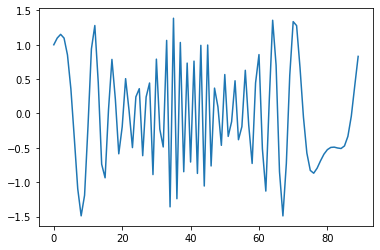

In [ ]:
plt.plot(signal)

In [ ]:
lowcut = 7.5
highcut = 12

In [ ]:
signal_f = butter_bandpass_filter(signal, lowcut, highcut, fs, order = 3)
analytic_signal = hilbert(signal_f)
envelope = abs(analytic_signal)

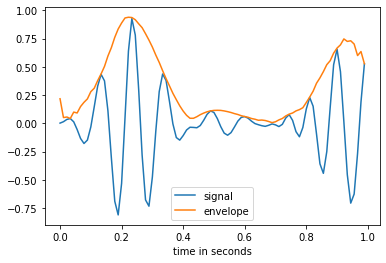

In [ ]:
fig, (ax0) = plt.subplots(nrows=1)
ax0.plot(t, signal_f, label='signal')
ax0.plot(t, envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

## **Fourier Transform**

In [ ]:
fourierTransform = np.fft.fft(signal_f)/len(signal_f)
fourierTransform = fourierTransform[range(int(len(signal_f)/2))]

In [ ]:
tpCount     = len(signal_f)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/fs
frequencies = values/timePeriod

Text(0, 0.5, 'Amplitude')

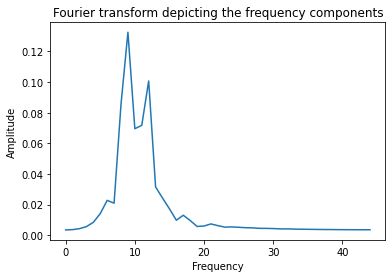

In [ ]:
# Frequency domain representation
figure, axis = plt.subplots()
plt.subplots_adjust(hspace=1)

axis.set_title('Fourier transform depicting the frequency components')
axis.plot(frequencies, abs(fourierTransform))
axis.set_xlabel('Frequency')
axis.set_ylabel('Amplitude')

In [ ]:
#@title Data retrieval
#@markdown This cell downloads the example dataset that we will use in this tutorial.
import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
  print('Failed to download data')
else:
  spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']

In [ ]:
spike_times.shape

(734,)

In [ ]:
i_neurons = [0, 321]
i_print = slice(0, 5)

for i in i_neurons:
  print(
    "Neuron {}:".format(i),
    spike_times[i].dtype,
    spike_times[i][i_print],
    "\n",
    sep="\n"
  )

Neuron 0:
float32
[ 0.8149   14.822467 24.9646   25.1436   38.8709  ]


Neuron 321:
float32
[1.0698667 1.1536334 1.2403667 1.7072    1.799    ]




In [ ]:
n_neurons = len(spike_times)
total_spikes_per_neuron = [len(spike_times_i) for spike_times_i in spike_times]

print(f"Number of neurons: {n_neurons}")
print(f"Number of spikes for first five neurons: {total_spikes_per_neuron[:5]}")

Number of neurons: 734
Number of spikes for first five neurons: [826, 2818, 3953, 646, 1115]


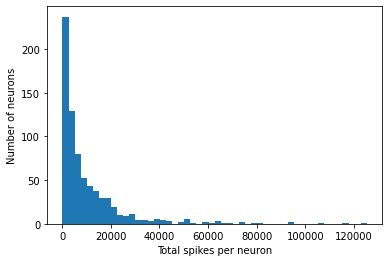

In [ ]:
plt.hist(total_spikes_per_neuron, bins=50, histtype="stepfilled")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons");

## **Whole Brain Recording**

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 656GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [ ]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


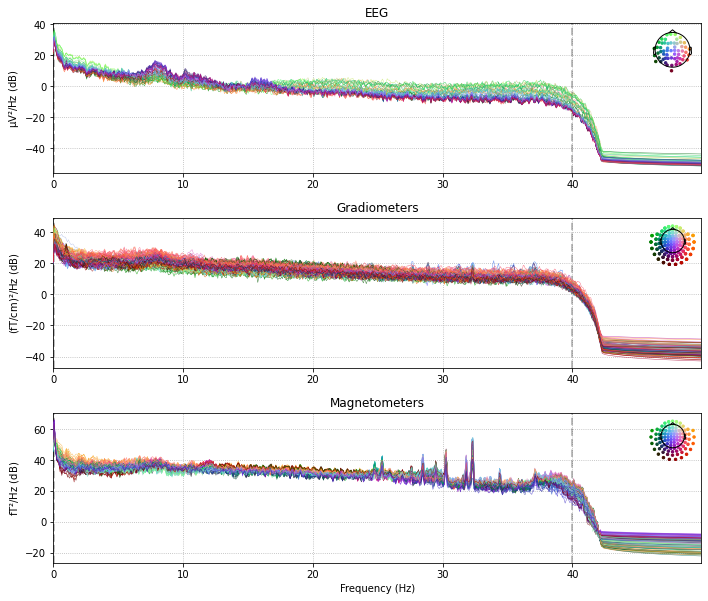

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


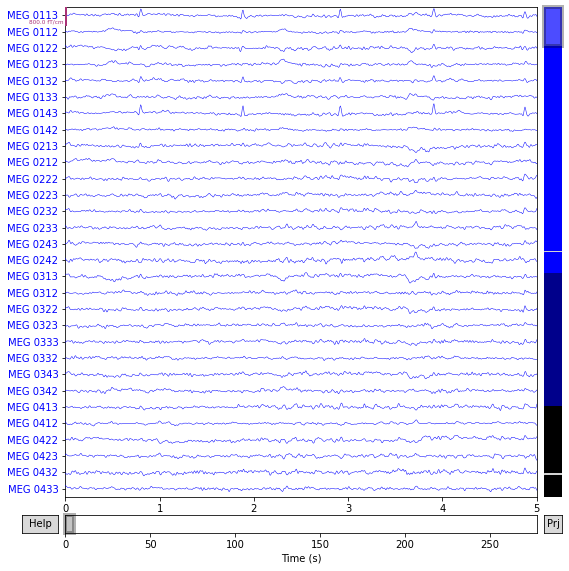

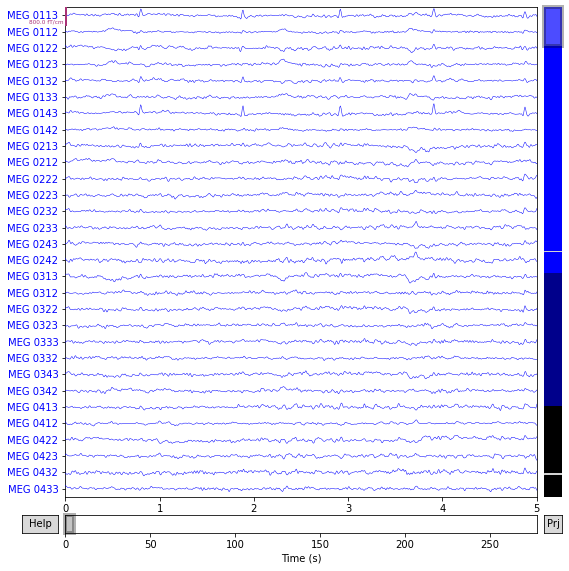

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

## **Signal from Surrounding**

In [ ]:
samplerate = 44100 #Frequecy in Hz
def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave


def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs
  
# To get the piano note's frequencies
note_freqs = get_piano_notes()

In [ ]:
def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'
data = get_song_data(music_notes)

data = data * (16300/np.max(data))

In [ ]:
wavfile.write('identify_sound.wav', samplerate, data.astype(np.int16))

In [ ]:
Audio('/content/identify_sound.wav')

## **It's time to Go To Mars**

In [163]:
url = 'https://drive.google.com/file/d/1yIYw-ONEQTWapEecpb9QChxyAUidRSuo/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)


In [164]:
df

,Time,Sample
0,02:49:58.491000Z,9797
1,02:49:58.991000Z,9841
2,02:49:59.491000Z,9840
3,02:49:59.991000Z,9872
4,02:50:00.491000Z,9915
...,...,...
7835,03:55:15.991000Z,5998
7836,03:55:16.491000Z,5968
7837,03:55:16.991000Z,5940
7838,03:55:17.491000Z,5864


In [165]:
data = np.array(df)

In [166]:
data

array([['02:49:58.491000Z', 9797],
       ['02:49:58.991000Z', 9841],
       ['02:49:59.491000Z', 9840],
       ...,
       ['03:55:16.991000Z', 5940],
       ['03:55:17.491000Z', 5864],
       ['03:55:17.991000Z', 5730]], dtype=object)

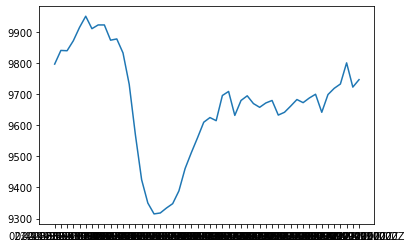

In [169]:
plt.plot(data[0:50, 0], data[0:50, 1])

(array([1.58543935e+07, 2.99745198e+07, 2.53288208e+07, 1.91763030e+07,
        1.31274695e+07, 8.34963349e+06, 5.24382133e+06, 3.54658514e+06,
        2.69782347e+06, 2.20533569e+06, 1.81661532e+06, 1.48281276e+06,
        1.22942957e+06, 1.05959920e+06, 9.38880749e+05, 8.29884568e+05,
        7.21042383e+05, 6.23522215e+05, 5.49585697e+05, 4.98169060e+05,
        4.58112427e+05, 4.19833049e+05, 3.81718694e+05, 3.47225029e+05,
        3.18773405e+05, 2.95356413e+05, 2.74624151e+05, 2.55504241e+05,
        2.38359521e+05, 2.23444765e+05, 2.10093499e+05, 1.97457665e+05,
        1.85485951e+05, 1.74782242e+05, 1.65622589e+05, 1.57442502e+05,
        1.49395994e+05, 1.41239719e+05, 1.33486825e+05, 1.26724736e+05,
        1.20941322e+05, 1.15583655e+05, 1.10176757e+05, 1.04764687e+05,
        9.97577430e+04, 9.54649706e+04, 9.18428127e+04, 8.86314785e+04,
        8.56122529e+04, 8.26933179e+04, 7.98310304e+04, 7.69830808e+04,
        7.41712343e+04, 7.15292997e+04, 6.92165174e+04, 6.726548

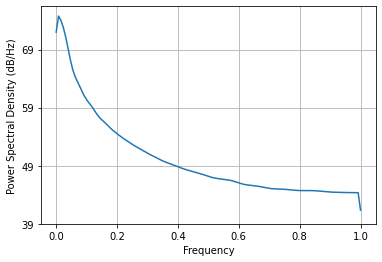

In [171]:
plt.psd(data[0:50, 1])